In [1]:
# loading initial libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datasets import load_dataset
import warnings
warnings.filterwarnings('ignore')

c:\Users\ssami\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# loading data
data = load_dataset('ashraq/fashion-product-images-small')
df = data['train'].to_pandas()
df

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...
...,...,...,...,...,...,...,...,...,...,...,...
44067,17036,Men,Footwear,Shoes,Casual Shoes,White,Summer,2013.0,Casual,Gas Men Caddy Casual Shoe,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...
44068,6461,Men,Footwear,Flip Flops,Flip Flops,Red,Summer,2011.0,Casual,Lotto Men's Soccer Track Flip Flop,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...
44069,18842,Men,Apparel,Topwear,Tshirts,Blue,Fall,2011.0,Casual,Puma Men Graphic Stellar Blue Tshirt,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...
44070,46694,Women,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,2017.0,Casual,Rasasi Women Blue Lady Perfume,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...


In [3]:
# dropping id column
df.drop('id', axis=1, inplace=True)
df.head()

,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image
0,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...
1,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...
2,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...
3,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...
4,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...


# EDA

In [4]:
# printing some basic information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44072 entries, 0 to 44071
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              44072 non-null  object 
 1   masterCategory      44072 non-null  object 
 2   subCategory         44072 non-null  object 
 3   articleType         44072 non-null  object 
 4   baseColour          44072 non-null  object 
 5   season              44072 non-null  object 
 6   year                44072 non-null  float64
 7   usage               44072 non-null  object 
 8   productDisplayName  44072 non-null  object 
 9   image               44072 non-null  object 
dtypes: float64(1), object(9)
memory usage: 3.4+ MB


In [5]:
# checking for missing values
df.isnull().sum()

gender                0
masterCategory        0
subCategory           0
articleType           0
baseColour            0
season                0
year                  0
usage                 0
productDisplayName    0
image                 0
dtype: int64

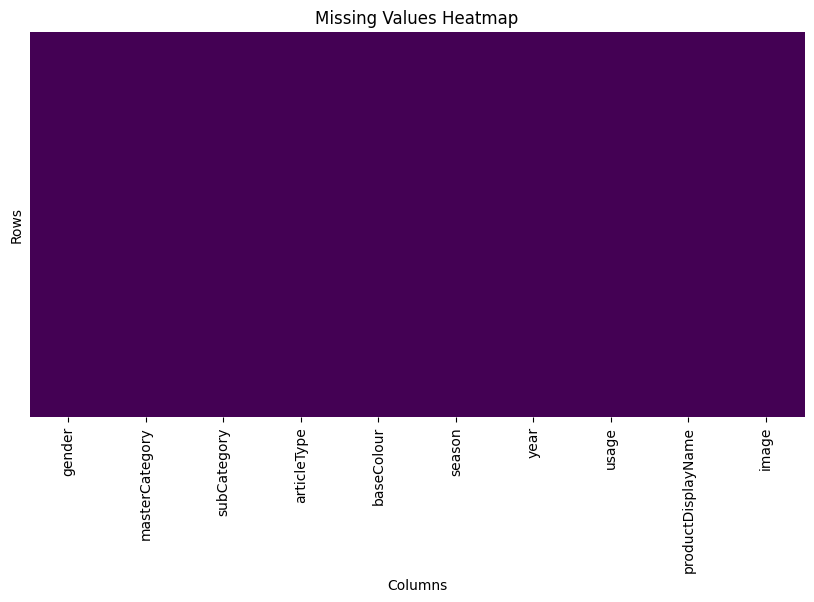

In [6]:
# visualizing missing
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False , yticklabels=False , cmap='viridis')
plt.title('Missing Values Heatmap')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

In [7]:
# checking for duplicates with skipping image column
df.drop('image', axis=1).duplicated().sum()

np.int64(10754)

- looks like we have some duplicates in the data

In [8]:
# checking categorical columns values
for col in df.drop(columns = ['productDisplayName' , 'image']).select_dtypes(include='object').columns:
    print(f'{col} : {df[col].unique()}')
    print('------------------------------------------------------------')

gender : ['Men' 'Women' 'Boys' 'Girls' 'Unisex']
------------------------------------------------------------
masterCategory : ['Apparel' 'Accessories' 'Footwear' 'Personal Care' 'Free Items'
 'Sporting Goods' 'Home']
------------------------------------------------------------
subCategory : ['Topwear' 'Bottomwear' 'Watches' 'Socks' 'Shoes' 'Belts' 'Flip Flops'
 'Bags' 'Innerwear' 'Sandal' 'Shoe Accessories' 'Fragrance' 'Jewellery'
 'Lips' 'Saree' 'Eyewear' 'Scarves' 'Dress' 'Loungewear and Nightwear'
 'Wallets' 'Apparel Set' 'Headwear' 'Mufflers' 'Skin Care' 'Makeup'
 'Free Gifts' 'Ties' 'Accessories' 'Nails' 'Beauty Accessories'
 'Water Bottle' 'Skin' 'Eyes' 'Bath and Body' 'Gloves'
 'Sports Accessories' 'Cufflinks' 'Sports Equipment' 'Stoles' 'Hair'
 'Perfumes' 'Home Furnishing' 'Umbrellas' 'Wristbands' 'Vouchers']
------------------------------------------------------------
articleType : ['Shirts' 'Jeans' 'Watches' 'Track Pants' 'Tshirts' 'Socks' 'Casual Shoes'
 'Belts' 'Flip Flops

In [9]:
# checking number of unique values in each column
for col in df.drop(columns = [ 'image']).columns:
    print(f'{col} : {df[col].nunique()}')
    print('------------------------------------------------------------')

gender : 5
------------------------------------------------------------
masterCategory : 7
------------------------------------------------------------
subCategory : 45
------------------------------------------------------------
articleType : 141
------------------------------------------------------------
baseColour : 46
------------------------------------------------------------
season : 4
------------------------------------------------------------
year : 13
------------------------------------------------------------
usage : 8
------------------------------------------------------------
productDisplayName : 30801
------------------------------------------------------------


- looks like there's almost no inconsistancy but there is some overlap in values between columns

In [10]:
# checking images duplicates
import hashlib

# converting images into hash values to recognise duplicates
def hash_image(img_bytes):
    return hashlib.md5(img_bytes).hexdigest()

# Extract raw bytes and check for duplicates
df["image_hash"] = df["image"].apply(lambda x: hash_image(x["bytes"]))
df['image_hash'].duplicated().sum()


np.int64(778)

- number of duplicates in image is lower than the text in the data

In [11]:
# checking duplicates for both text data and images togehter
df.drop('image', axis=1).duplicated().sum()

np.int64(540)

- so the final thoughts is that there is only 540 duplicated rows


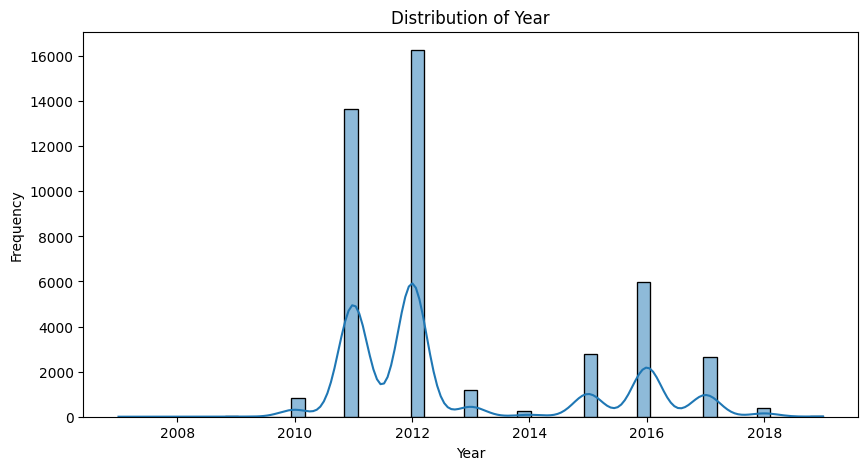

In [12]:
# checking distribution for year column
plt.figure(figsize=(10, 5))
sns.histplot(df['year'], kde=True)
plt.title('Distribution of Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

- looks like this dataset is not much up-to-date
- fashion around 2011 and 2012 froms most of the data

In [13]:
# checking class balance
df.usage.value_counts()

usage
Casual          34392
Sports           4004
Ethnic           3208
Formal           2345
Smart Casual       67
Party              29
Travel             26
Home                1
Name: count, dtype: int64

- there is huge class imbalance in the dataset

# data cleaning

In [14]:
# drop duplicated rows
duplicated_rows = df[df.drop(columns='image').duplicated()].index
df.drop( index=duplicated_rows , inplace=True)
df

,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image,image_hash
0,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,b2a14e4f4d4a386517a575407ed1a19f
1,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,35dbd5098857f92c4c7a515f0ee09ba1
2,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,fd311df25e014cc624a2e4c213b3fa2e
3,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,2bd7322cf550042007b9cda4517ff251
4,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,c4f464cf8c2a50236f5f3b27648b8e5e
...,...,...,...,...,...,...,...,...,...,...,...
44067,Men,Footwear,Shoes,Casual Shoes,White,Summer,2013.0,Casual,Gas Men Caddy Casual Shoe,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,421fed7d7d46a06fdcb988cffccf0ea2
44068,Men,Footwear,Flip Flops,Flip Flops,Red,Summer,2011.0,Casual,Lotto Men's Soccer Track Flip Flop,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,f2688260454d8b3b005936b2a4152408
44069,Men,Apparel,Topwear,Tshirts,Blue,Fall,2011.0,Casual,Puma Men Graphic Stellar Blue Tshirt,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,75f9ba00b2155578bac3e18c37ee596c
44070,Women,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,2017.0,Casual,Rasasi Women Blue Lady Perfume,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,571bf7731aad2515d7010705f06472b7


In [15]:
# dropping low samples classes depending on usage column
small_classes = ['Smart Casual' , 'Party' , 'Travel' , 'Home']
df = df[~df['usage'].isin(small_classes)]
df

,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image,image_hash
0,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,b2a14e4f4d4a386517a575407ed1a19f
1,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,35dbd5098857f92c4c7a515f0ee09ba1
2,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,fd311df25e014cc624a2e4c213b3fa2e
3,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,2bd7322cf550042007b9cda4517ff251
4,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,c4f464cf8c2a50236f5f3b27648b8e5e
...,...,...,...,...,...,...,...,...,...,...,...
44067,Men,Footwear,Shoes,Casual Shoes,White,Summer,2013.0,Casual,Gas Men Caddy Casual Shoe,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,421fed7d7d46a06fdcb988cffccf0ea2
44068,Men,Footwear,Flip Flops,Flip Flops,Red,Summer,2011.0,Casual,Lotto Men's Soccer Track Flip Flop,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,f2688260454d8b3b005936b2a4152408
44069,Men,Apparel,Topwear,Tshirts,Blue,Fall,2011.0,Casual,Puma Men Graphic Stellar Blue Tshirt,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,75f9ba00b2155578bac3e18c37ee596c
44070,Women,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,2017.0,Casual,Rasasi Women Blue Lady Perfume,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,571bf7731aad2515d7010705f06472b7


In [16]:
# balancing the classes using under sampling
from sklearn.utils import resample
# Separate majority and minority classes
majority_class = df[df.usage == 'Casual']
minority_classes = df[df.usage != 'Casual']
# Downsample majority class
majority_downsampled = resample(majority_class,
                                 replace=False,    # sample without replacement
                                 n_samples=minority_classes.usage.value_counts().max(), # to match minority class
                                 random_state=42) # reproducible results
# Combine minority classes with downsampled majority class
df_balanced = pd.concat([majority_downsampled, minority_classes])
df_balanced.usage.value_counts()

usage
Casual    4004
Sports    4004
Ethnic    3206
Formal    2285
Name: count, dtype: int64

In [17]:
df_balanced.reset_index(drop=True, inplace=True)
df_balanced

,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image,image_hash
0,Men,Footwear,Shoes,Casual Shoes,Black,Fall,2011.0,Casual,iD Men Casual Black Shoes,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,f0526073b5b3358950cee22c09d517f7
1,Men,Apparel,Topwear,Shirts,White,Summer,2012.0,Casual,Denizen Men White Shirt,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,6cb1a32eabcb9a7803ac87ec100b4345
2,Unisex,Accessories,Watches,Watches,Yellow,Winter,2016.0,Casual,Q&Q Kids Unisex White Dial Analog Watch,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,1153c0891b8ca9df6a54ee6d7996a802
3,Men,Apparel,Topwear,Tshirts,Pink,Fall,2011.0,Casual,Flying Machine Men Damson Maroon Tshirts,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,bbb7fd63998312867edf2da30f82f48e
4,Men,Apparel,Innerwear,Innerwear Vests,Black,Summer,2016.0,Casual,Levis Men Black & White Innerwear Vest,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,cac4d0dc316cc3c36325f393fc757034
...,...,...,...,...,...,...,...,...,...,...,...
13494,Men,Apparel,Bottomwear,Shorts,White,Spring,2013.0,Sports,Nike Men As Woven Shor White Shorts,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,8b481616853c51c6a230e60c4c41b0f4
13495,Men,Apparel,Topwear,Tshirts,Black,Summer,2012.0,Sports,Nike Men Black T-shirt,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,001facfba4a202f6d816c36b9a25d7dd
13496,Men,Footwear,Shoes,Sports Shoes,White,Summer,2011.0,Sports,Fila Men's Leonard White Black Shoe,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,5a36b4912283c3926ca9155a96f41337
13497,Men,Apparel,Topwear,Tshirts,Red,Fall,2010.0,Sports,Kipsta Men Loose Fit Round Neck Jersey Red,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,e7de9cb7ec803a1d3a283b99eb140ad4


- converting image column to pixels

In [18]:
# getting image pixels values
import io
from PIL import Image

def get_img_pixels(img_dict):
    img_bytes = img_dict["bytes"]
    # Convert bytes → PIL Image
    img = Image.open(io.BytesIO(img_bytes))

    # Convert PIL Image → numpy array of pixels
    pixels = np.array(img)
    return pixels

df_balanced['image_pixels'] = df_balanced['image'].apply(get_img_pixels)
df_balanced['image_pixels']

0        [[[255, 255, 255], [255, 255, 255], [255, 255,...
1        [[[255, 255, 255], [255, 255, 255], [255, 255,...
2        [[[255, 255, 255], [255, 255, 255], [255, 255,...
3        [[[255, 255, 255], [255, 255, 255], [255, 255,...
4        [[[255, 255, 255], [255, 255, 255], [255, 255,...
                               ...                        
13494    [[[255, 255, 255], [255, 255, 255], [255, 255,...
13495    [[[255, 255, 255], [255, 255, 255], [255, 255,...
13496    [[[255, 255, 255], [255, 255, 255], [255, 255,...
13497    [[[255, 255, 255], [255, 255, 255], [255, 255,...
13498    [[[255, 255, 255], [255, 255, 255], [255, 255,...
Name: image_pixels, Length: 13499, dtype: object

# visualizations


In [19]:
df_balanced

,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image,image_hash,image_pixels
0,Men,Footwear,Shoes,Casual Shoes,Black,Fall,2011.0,Casual,iD Men Casual Black Shoes,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,f0526073b5b3358950cee22c09d517f7,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
1,Men,Apparel,Topwear,Shirts,White,Summer,2012.0,Casual,Denizen Men White Shirt,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,6cb1a32eabcb9a7803ac87ec100b4345,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
2,Unisex,Accessories,Watches,Watches,Yellow,Winter,2016.0,Casual,Q&Q Kids Unisex White Dial Analog Watch,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,1153c0891b8ca9df6a54ee6d7996a802,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
3,Men,Apparel,Topwear,Tshirts,Pink,Fall,2011.0,Casual,Flying Machine Men Damson Maroon Tshirts,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,bbb7fd63998312867edf2da30f82f48e,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
4,Men,Apparel,Innerwear,Innerwear Vests,Black,Summer,2016.0,Casual,Levis Men Black & White Innerwear Vest,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,cac4d0dc316cc3c36325f393fc757034,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
...,...,...,...,...,...,...,...,...,...,...,...,...
13494,Men,Apparel,Bottomwear,Shorts,White,Spring,2013.0,Sports,Nike Men As Woven Shor White Shorts,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,8b481616853c51c6a230e60c4c41b0f4,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
13495,Men,Apparel,Topwear,Tshirts,Black,Summer,2012.0,Sports,Nike Men Black T-shirt,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,001facfba4a202f6d816c36b9a25d7dd,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
13496,Men,Footwear,Shoes,Sports Shoes,White,Summer,2011.0,Sports,Fila Men's Leonard White Black Shoe,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,5a36b4912283c3926ca9155a96f41337,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
13497,Men,Apparel,Topwear,Tshirts,Red,Fall,2010.0,Sports,Kipsta Men Loose Fit Round Neck Jersey Red,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,e7de9cb7ec803a1d3a283b99eb140ad4,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."


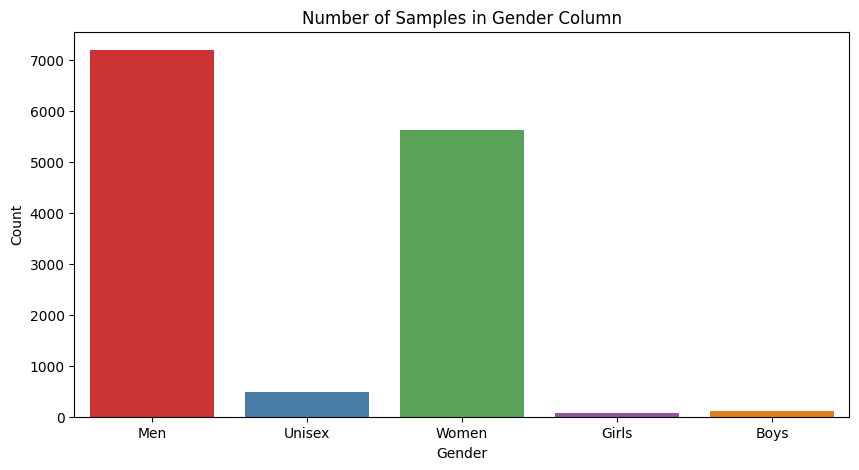

In [20]:
# visualizing number of samples in gender
plt.figure(figsize=(10, 5))
sns.countplot(x='gender', data=df_balanced, palette='Set1')
plt.title('Number of Samples in Gender Column')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

Text(0, 0.5, 'Count')

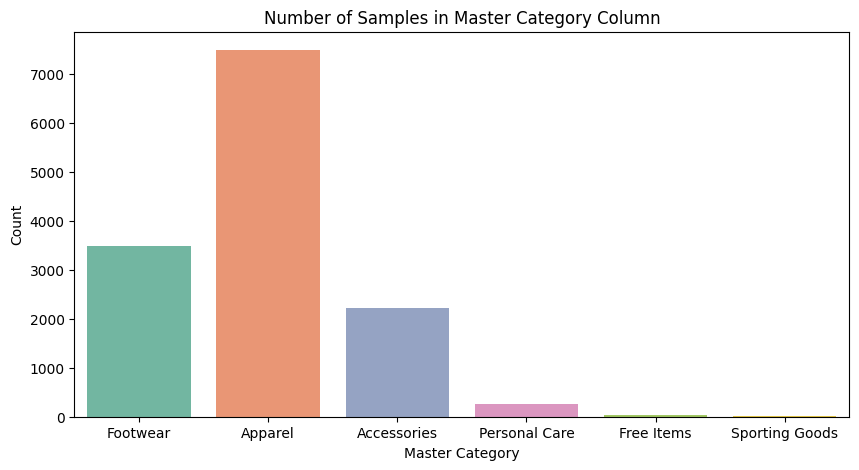

In [21]:
# visualizing number of samples in masterCategory feature
plt.figure(figsize=(10, 5))
sns.countplot(x='masterCategory', data=df_balanced , palette='Set2')
plt.title('Number of Samples in Master Category Column')
plt.xlabel('Master Category')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

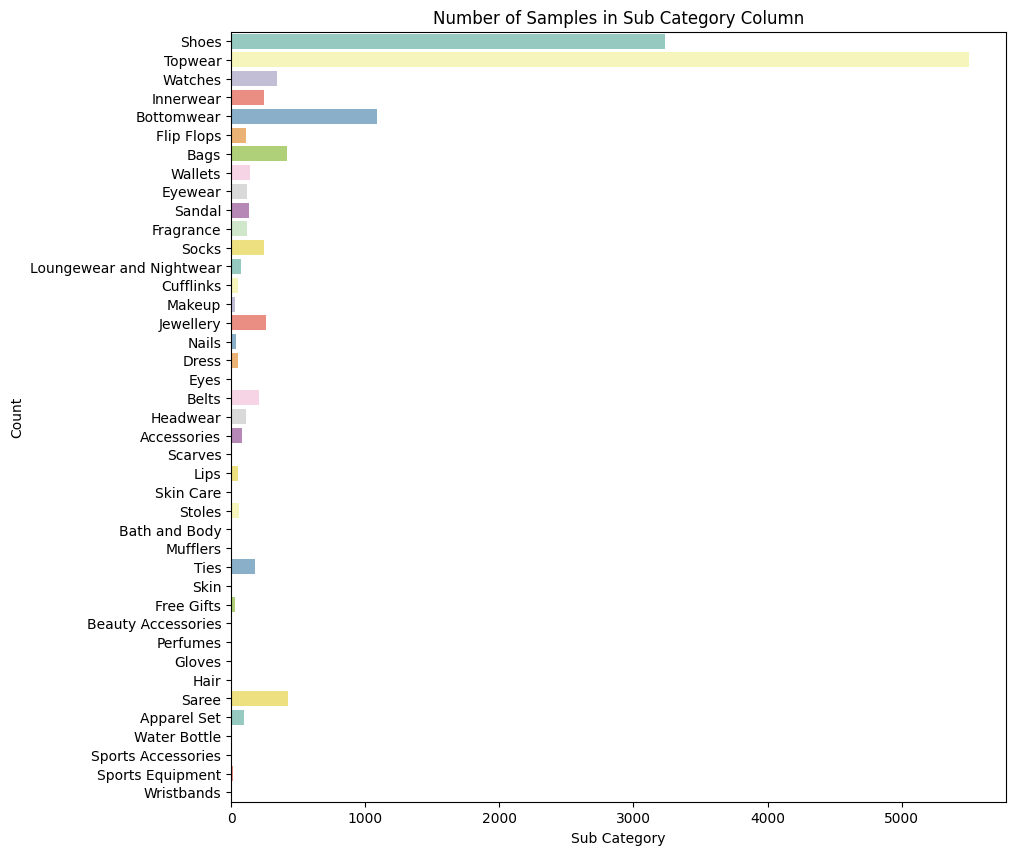

In [22]:
# visualizing number of samples in subCategory column
plt.figure(figsize=(10, 10))
sns.countplot(y='subCategory', data=df_balanced , palette='Set3')
plt.title('Number of Samples in Sub Category Column')
plt.xlabel('Sub Category')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

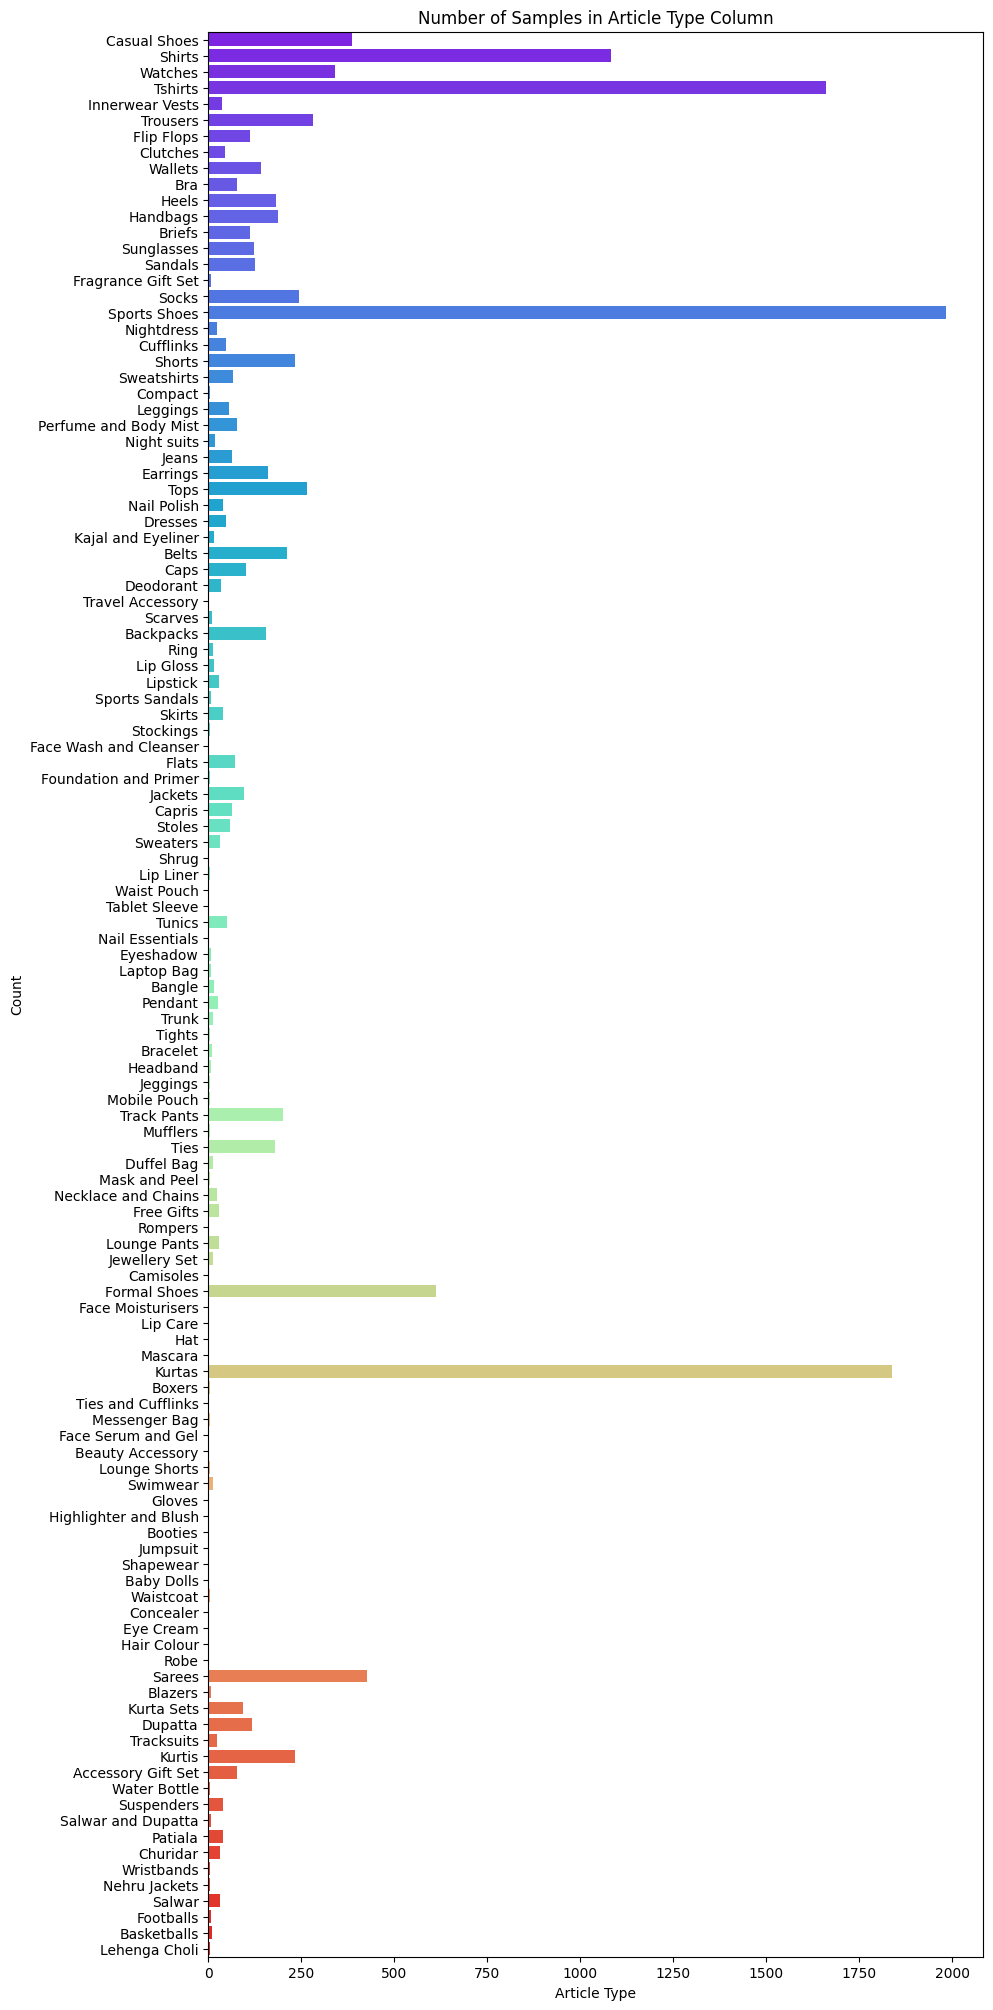

In [23]:
# visualizing the number of samples in articleType column
plt.figure(figsize=(10, 25))
sns.countplot(y='articleType', data=df_balanced , palette='rainbow')
plt.title('Number of Samples in Article Type Column')
plt.xlabel('Article Type')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

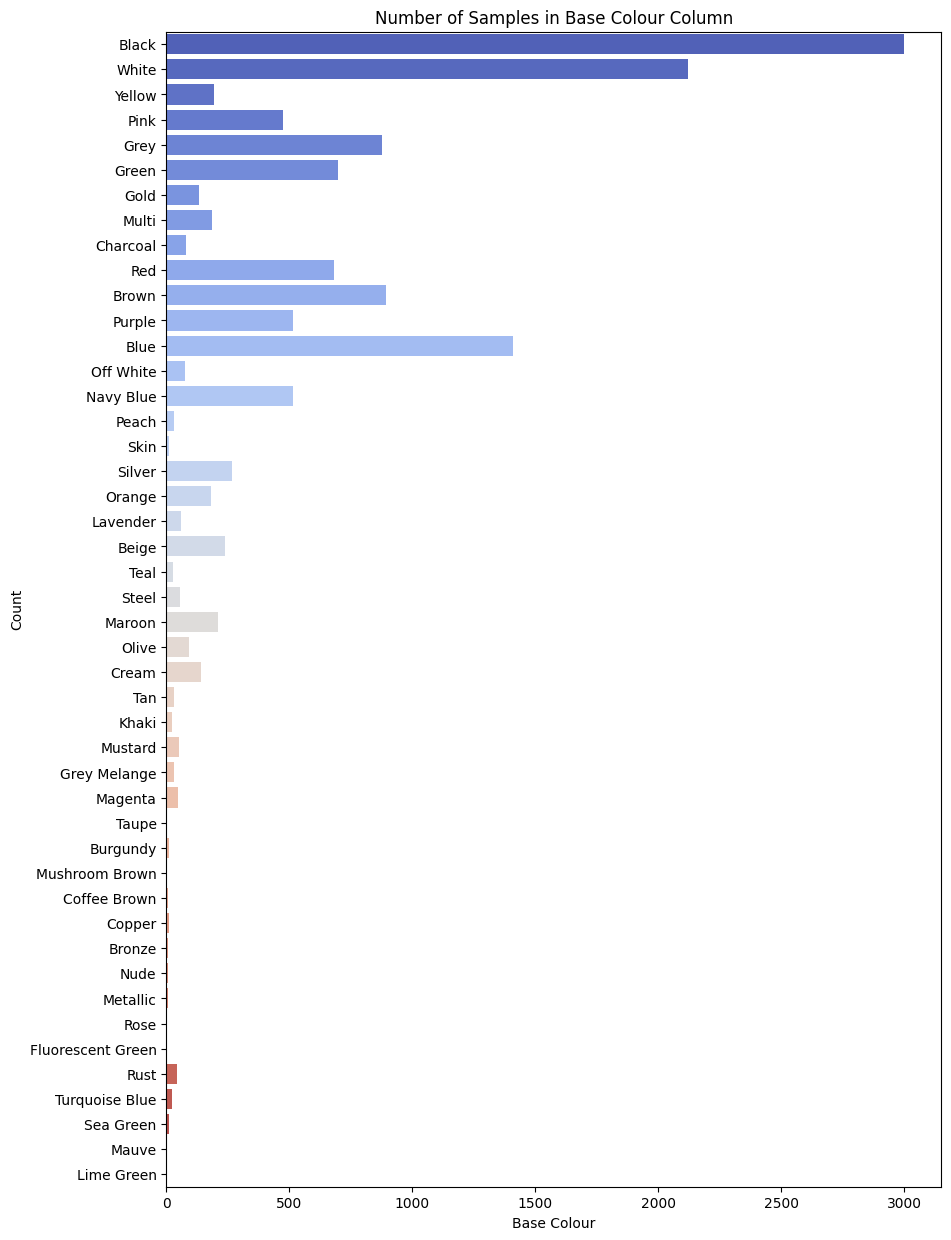

In [24]:
# visualizing number of samples for baseColour column
plt.figure(figsize=(10, 15))
sns.countplot(y='baseColour', data=df_balanced , palette='coolwarm')
plt.title('Number of Samples in Base Colour Column')
plt.xlabel('Base Colour')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

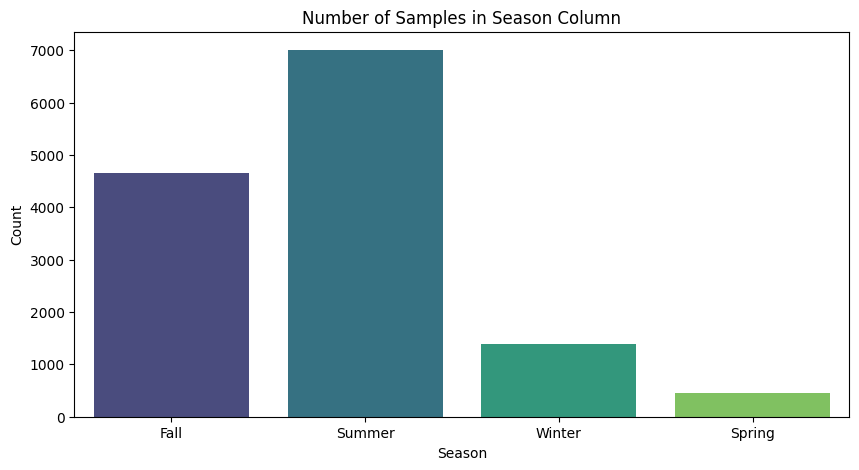

In [25]:
# visualizing the number of samples in season column
plt.figure(figsize=(10, 5))
sns.countplot(x='season', data=df_balanced  , palette='viridis')
plt.title('Number of Samples in Season Column')
plt.xlabel('Season')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

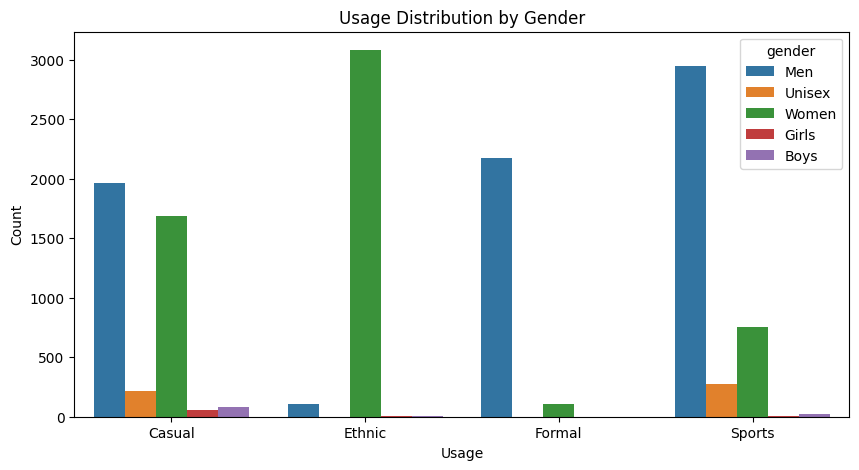

In [26]:
# visualizing usage hued by gender
plt.figure(figsize=(10, 5))
sns.countplot(x='usage', hue='gender', data=df_balanced)
plt.title('Usage Distribution by Gender')
plt.xlabel('Usage')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

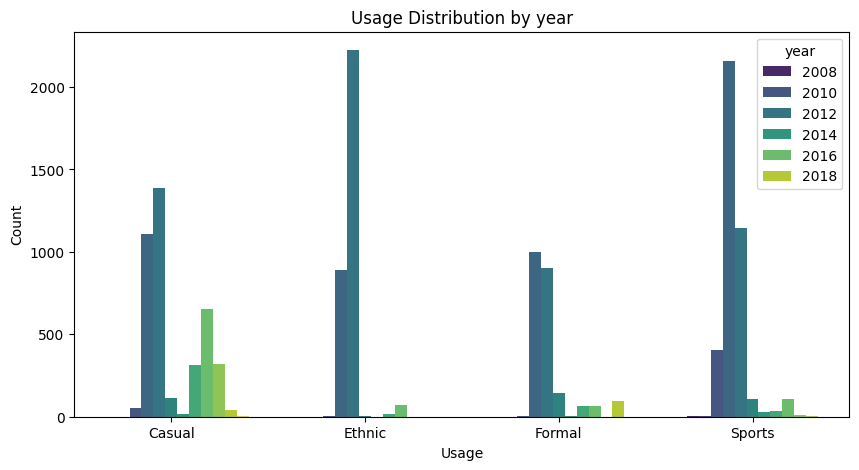

In [27]:
# visualizing usage hued by year
plt.figure(figsize=(10, 5))
sns.countplot(x='usage', hue='year', data=df_balanced , palette = 'viridis')
plt.title('Usage Distribution by year')
plt.xlabel('Usage')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

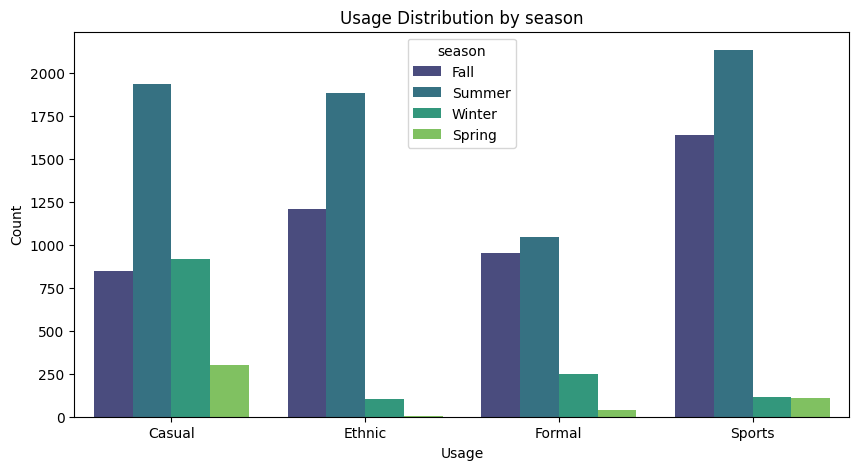

In [28]:
# visualizing usage hued by season
plt.figure(figsize=(10, 5))
sns.countplot(x='usage', hue='season', data=df_balanced , palette = 'viridis')
plt.title('Usage Distribution by season')
plt.xlabel('Usage')
plt.ylabel('Count')

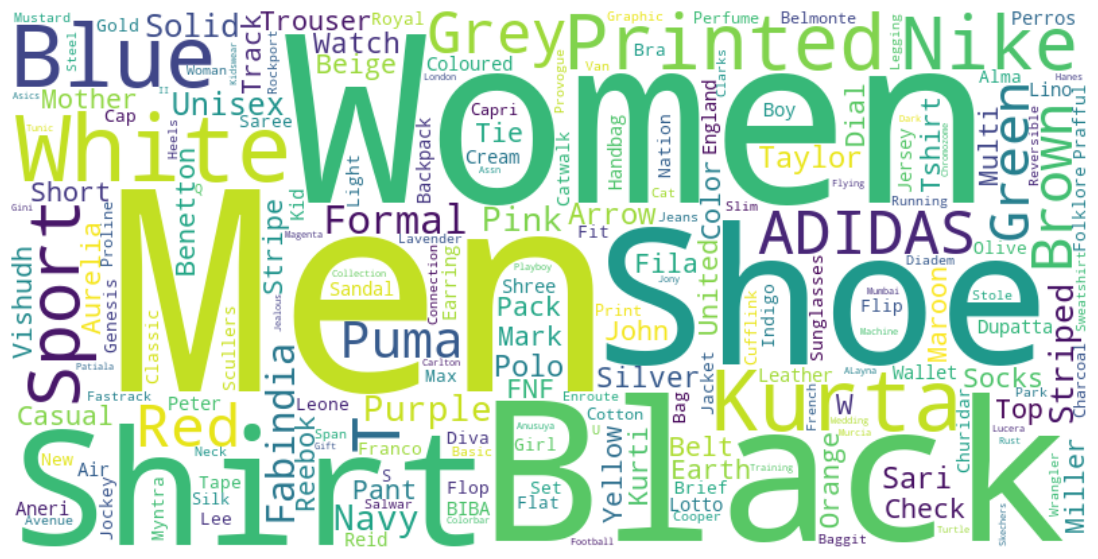

In [29]:
# visualizing the most frequent words in our text
from wordcloud import WordCloud

corpus = " ".join(df_balanced['productDisplayName'])
# Create a WordCloud object
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white', # You can choose any background color
    colormap='viridis', # A colormap for word colors
    max_words=200, # Maximum number of words to display
    collocations=False # Disable generating bigrams (pairs of words)
).generate(corpus)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

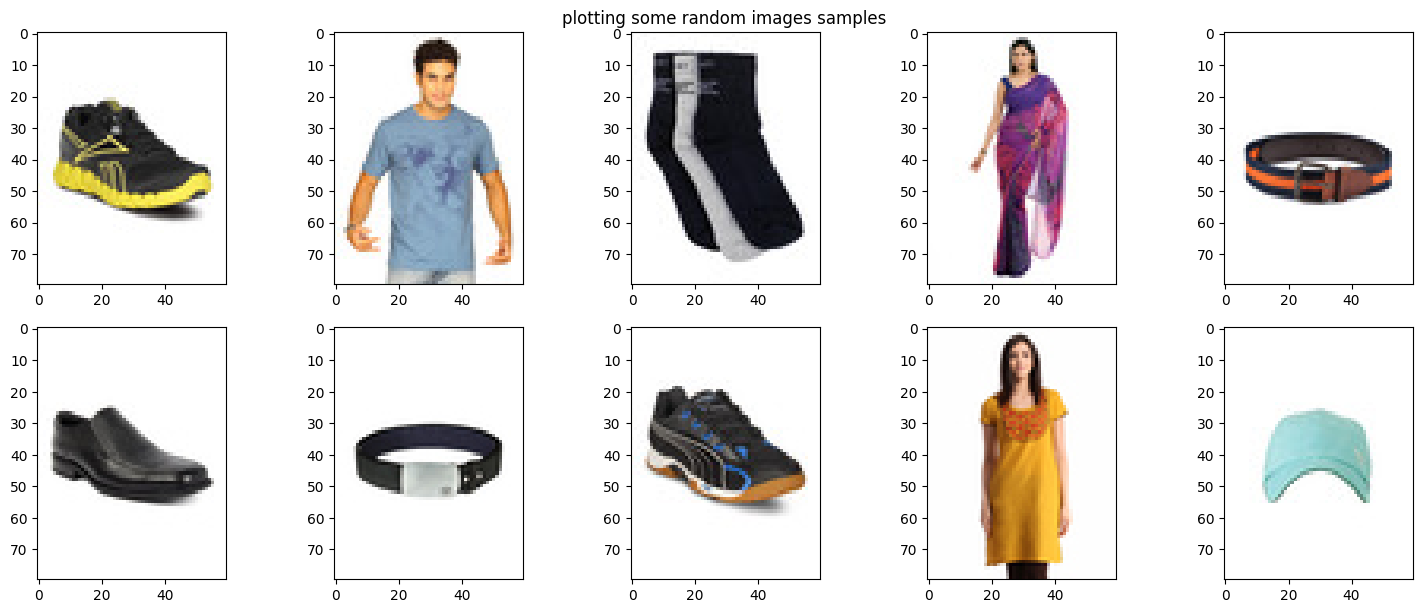

In [30]:
# displaying some images samples
fig =1
plt.figure(figsize=(15,15))
plt.suptitle('plotting some random images samples')
for img in df_balanced['image_pixels'].sample(10).values:
    plt.subplot(5,5,fig)
    plt.imshow(img)
    fig +=1

plt.tight_layout()
plt.show()

- looks like images resolution is not that good

# splitting data
- we'll be working with only 3 columns:
- `image pixels`
- ` product display name `
- ` usage `

In [31]:
# splitting target from features
x = df_balanced[['productDisplayName' , 'image_pixels']]
y = df_balanced['usage']



In [32]:
# splitting data into train and test
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=42 , stratify=y)

# data preprocessing

### for images :
- make all photos of size 128x128
- improve image quality
- normalize all images to range from 0 to 1

In [33]:
import cv2
def preprocess_image_debug(img):
    # print("\n===== TRAINING IMAGE DEBUG =====")
    # print("RAW image type:", type(img))

    # ---- COPY THE REAL PREPROCESSING ----
    if img is None or not isinstance(img, np.ndarray):
        return None

    # Ensure 3 channels
    if img.ndim == 2:
        img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

    if img.shape[2] == 4:  # RGBA → RGB
        img = cv2.cvtColor(img, cv2.COLOR_BGRA2BGR)

    # Sharpen
    kernel = np.array([[0, -1, 0],
                       [-1, 5, -1],
                       [0, -1, 0]])
    img = cv2.filter2D(img, -1, kernel)

    # Resize
    img = cv2.resize(img, (128, 128), interpolation=cv2.INTER_AREA)

    # Normalize
    img = img.astype("float32") / 255.0

    print("AFTER preprocess shape:", img.shape)
    print("AFTER preprocess first pixel:", img[0, 0])

    return img


In [34]:
# enhancing images
from joblib import Parallel, delayed
x_train['image_pixels'] = Parallel(n_jobs=4)(delayed(preprocess_image_debug)(img) for img in x_train['image_pixels'])
x_test['image_pixels'] = Parallel(n_jobs=4)(delayed(preprocess_image_debug)(img) for img in x_test['image_pixels'])



In [35]:
x_train.shape


(10799, 2)

### for target :
- encoding using label encoder

In [36]:
# applying label encoder
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)


In [37]:
import joblib
joblib.dump(label_encoder, "label_encoder.joblib")

['label_encoder.joblib']

### text preprocessing
- using pretrained model

In [38]:
# encoding the text using pretrained model (Bert)
from transformers import AutoTokenizer, AutoModel
import torch

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModel.from_pretrained("bert-base-uncased")

In [39]:
from tqdm import tqdm

# Put model in evaluation mode
model.eval()

# Optional: Use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Function to get mean pooled embedding
def get_embedding(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True).to(device)
    with torch.no_grad():
        outputs = model(**inputs)
    embedding = outputs.last_hidden_state.mean(dim=1).squeeze().cpu().numpy()
    return embedding

In [40]:
# Apply to DataFrame column
tqdm.pandas()  # for progress bar
x_train["productEmbedding"] = x_train["productDisplayName"].progress_apply(get_embedding)
x_test["productEmbedding"] = x_test["productDisplayName"].progress_apply(get_embedding)

100%|██████████| 2700/2700 [01:42<00:00, 26.23it/s]


In [41]:
x_train['productEmbedding']

9372     [0.72427547, -0.24629442, -0.52753526, -0.0616...
11118    [0.1917454, 0.01758438, -0.7149373, -0.1479898...
13177    [0.20069312, -0.6825412, -0.18244067, 0.055097...
5025     [0.27616814, -0.122196965, -0.43160197, -0.344...
1210     [0.49720877, -0.15911555, 0.42211694, 0.166080...
                               ...                        
5949     [0.50196904, -0.07212435, -0.053167857, 0.0494...
8405     [0.030371977, 0.15981111, -0.49047926, -0.2009...
10654    [0.63755095, 0.11681513, -0.42583016, 0.073710...
8663     [0.40547138, -0.47648656, -0.37352368, -0.2703...
9406     [-0.49867955, -0.13441893, 0.37491468, -0.2443...
Name: productEmbedding, Length: 10799, dtype: object

# building model

### first model ###

In [42]:
# libraries
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, Dense, Dropout,LSTM, Conv2D, MaxPooling2D, Flatten, GlobalAveragePooling2D, Concatenate
)
from tensorflow.keras import regularizers

In [43]:
# TEXT BRANCH
text_input_1 = Input(shape=(1, 768), name='text_input')
x_text_1 = LSTM(64,kernel_regularizer=regularizers.l2(0.001))(text_input_1)
x_text_1 = Dropout(0.2)(x_text_1)

In [44]:
# IMAGE BRANCH
image_input_1 = Input(shape=(128, 128, 3), name='image_input')
x_image_1 = Conv2D(32, (3, 3),kernel_regularizer=regularizers.l2(0.1), activation='relu')(image_input_1)
x_image_1 = MaxPooling2D((2, 2))(x_image_1)
x_image_1 = Conv2D(64, (3, 3), activation='relu')(x_image_1)
x_image_1 = MaxPooling2D((2, 2))(x_image_1)
x_image_1 = Flatten()(x_image_1)
x_image_1 = Dropout(0.5)(x_image_1)

In [45]:
# CONCATENATE
combined_1 = Concatenate()([x_text_1, x_image_1])
x_1 = Dense(64, activation='relu')(combined_1)
output_1 = Dense(4, activation='softmax')(x_1)  # Use softmax for multi-class

In [46]:
# MODEL
model_1 = Model(inputs=[text_input_1, image_input_1], outputs=output_1)
model_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_1.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ image_input         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 126, 126,  │        896 │ image_input[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 63, 63,    │          0 │ conv2d[0][0]      │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 61, 61,    │     18,496 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ text_input          │ (None, 1, 768)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 30, 30,    │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ (None, 64)        │    213,248 │ text_input[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 57600)     │          0 │ max_pooling2d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 64)        │          0 │ lstm[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 57600)     │          0 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 57664)     │          0 │ dropout[0][0],    │
│ (Concatenate)       │                   │            │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 64)        │  3,690,560 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 4)         │        260 │ dense[0][0]       │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 3,923,460 (14.97 MB)

 Trainable params: 3,923,460 (14.97 MB)

 Non-trainable params: 0 (0.00 B)

In [47]:
# computing class weights for better generalization
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))
class_weight_dict

{0: np.float64(0.8428816734311583),
 1: np.float64(1.0525341130604289),
 2: np.float64(1.476887308533917),
 3: np.float64(0.8428816734311583)}

In [48]:
label_encoder.classes_

array(['Casual', 'Ethnic', 'Formal', 'Sports'], dtype=object)

In [49]:
# training the model
# Step 1: Convert text to sequence embeddings (shape: [1, 768])
x_train_text_embeddings_1 = np.stack(x_train['productEmbedding'].values)
x_train_text_embeddings_1 = x_train_text_embeddings_1.reshape((-1, 1, 768))

# Step 2: Prepare image data
x_train_image_data_1 = np.stack(x_train['image_pixels'])

# Step 3: Train the model
history = model_1.fit(
    {'text_input': x_train_text_embeddings_1, 'image_input': x_train_image_data_1},
    y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    class_weight=class_weight_dict
)

Epoch 1/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 39s 274ms/step - accuracy: 0.7587 - loss: 1.0883 - val_accuracy: 0.8884 - val_loss: 0.5967
Epoch 2/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 37s 271ms/step - accuracy: 0.9035 - loss: 0.4778 - val_accuracy: 0.9148 - val_loss: 0.4198
Epoch 3/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 39s 287ms/step - accuracy: 0.9208 - loss: 0.3547 - val_accuracy: 0.9222 - val_loss: 0.3422
Epoch 4/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 37s 272ms/step - accuracy: 0.9361 - loss: 0.2737 - val_accuracy: 0.9245 - val_loss: 0.2960
Epoch 5/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 37s 272ms/step - accuracy: 0.9384 - loss: 0.2393 - val_accuracy: 0.9190 - val_loss: 0.2954
Epoch 6/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 36s 270ms/step - accuracy: 0.9434 - loss: 0.2109 - val_accuracy: 0.9301 - val_loss: 0.2628
Epoch 7/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 37s 276ms/step - accuracy: 0.9562 - loss: 0.1723 - val_accuracy: 0.9185 - val_loss: 0.2747
Epoch 8/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 37s 272ms/step - accuracy: 0.9598 - loss: 0

### second model ###

In [50]:
# TEXT BRANCH
text_input_2 = Input(shape=(768,), name="text_input")

# Dense layers instead of LSTM
x_text_2 = Dense(256, activation="relu")(text_input_2)
x_text_2 = Dropout(0.3)(x_text_2)
x_text_2 = Dense(128, activation="relu")(x_text_2)
x_text_2 = Dropout(0.3)(x_text_2)

In [51]:
# IMAGE BRANCH
image_input_2 = Input(shape=(128, 128, 3), name="image_input")

x_image_2 = Conv2D(32, (3, 3), activation="relu")(image_input_2)
x_image_2 = MaxPooling2D((2, 2))(x_image_2)

x_image_2 = Conv2D(64, (3, 3), activation="relu")(x_image_2)
x_image_2 = MaxPooling2D((2, 2))(x_image_2)

x_image_2 = Conv2D(128, (3, 3), activation="relu")(x_image_2)
x_image_2 = MaxPooling2D((2, 2))(x_image_2)

# Much smaller and more stable than Flatten
x_image_2 = GlobalAveragePooling2D()(x_image_2)
x_image_2 = Dense(128, activation="relu")(x_image_2)
x_image_2 = Dropout(0.4)(x_image_2)

In [52]:
# CONCATENATE
combined_2 = Concatenate()([x_text_2, x_image_2])
x_2 = Dense(128, activation="relu")(combined_2)
x_2 = Dropout(0.3)(x_2)

output_2 = Dense(4, activation="softmax")(x_2)


In [53]:
# MODEL
model_2 = Model(inputs=[text_input_2, image_input_2], outputs=output_2)
model_2.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

model_2.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ image_input         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 126, 126,  │        896 │ image_input[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 63, 63,    │          0 │ conv2d_2[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 61, 61,    │     18,496 │ max_pooling2d_2[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 30, 30,    │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ text_input          │ (None, 768)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 28, 28,    │     73,856 │ max_pooling2d_3[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 256)       │    196,864 │ text_input[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 14, 14,    │          0 │ conv2d_4[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 256)       │          0 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 128)       │          0 │ max_pooling2d_4[… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 128)       │     32,896 │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 128)       │     16,512 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 128)       │          0 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 128)       │          0 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 256)       │          0 │ dropout_3[0][0],  │
│ (Concatenate)       │                   │            │ dropout_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 128)       │     32,896 │ concatenate_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_5 (Dropout) │ (None, 128)       │          0 │ dense_5[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 4)         │        516 │ dropout_5[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 372,932 (1.42 MB)

 Trainable params: 372,932 (1.42 MB)

 Non-trainable params: 0 (0.00 B)

In [54]:
# computing class weights for better generalization
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))
class_weight_dict

{0: np.float64(0.8428816734311583),
 1: np.float64(1.0525341130604289),
 2: np.float64(1.476887308533917),
 3: np.float64(0.8428816734311583)}

In [55]:
label_encoder.classes_

array(['Casual', 'Ethnic', 'Formal', 'Sports'], dtype=object)

In [56]:
# Step 1: Convert text embeddings to numpy arrays
x_train_text_embeddings_2 = np.stack(x_train['productEmbedding'].values)
x_test_text_embeddings_2 = np.stack(x_test['productEmbedding'].values)

# Step 2: Image data
x_train_image_data_2 = np.stack(x_train['image_pixels'])
x_test_image_data_2  = np.stack(x_test['image_pixels'])

# Step 3: Train the model
history = model_2.fit(
    {'text_input': x_train_text_embeddings_2, 'image_input': x_train_image_data_2},
    y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    class_weight=class_weight_dict
)

Epoch 1/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 41s 290ms/step - accuracy: 0.7677 - loss: 0.5534 - val_accuracy: 0.8810 - val_loss: 0.3102
Epoch 2/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 38s 282ms/step - accuracy: 0.8713 - loss: 0.3276 - val_accuracy: 0.8741 - val_loss: 0.3439
Epoch 3/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 38s 282ms/step - accuracy: 0.8914 - loss: 0.2752 - val_accuracy: 0.9194 - val_loss: 0.2317
Epoch 4/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 40s 297ms/step - accuracy: 0.9009 - loss: 0.2473 - val_accuracy: 0.9185 - val_loss: 0.2288
Epoch 5/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 40s 297ms/step - accuracy: 0.9081 - loss: 0.2212 - val_accuracy: 0.9231 - val_loss: 0.2187
Epoch 6/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 37s 277ms/step - accuracy: 0.9208 - loss: 0.2009 - val_accuracy: 0.9116 - val_loss: 0.2319
Epoch 7/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 38s 279ms/step - accuracy: 0.9221 - loss: 0.1885 - val_accuracy: 0.9181 - val_loss: 0.2199
Epoch 8/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 39s 289ms/step - accuracy: 0.9257 - loss: 0

# model evaluation

### first model evaluation ###

In [57]:
# testing model for underfitting
y_train_pred = model_1.predict([x_train_text_embeddings_1, x_train_image_data_1])
y_train_pred_classes = np.argmax(y_train_pred, axis=1)

# printing accuracy
from sklearn.metrics import accuracy_score
print(f'train accuracy : {accuracy_score(y_train , y_train_pred_classes)}')

338/338 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step
train accuracy : 0.972404852301139


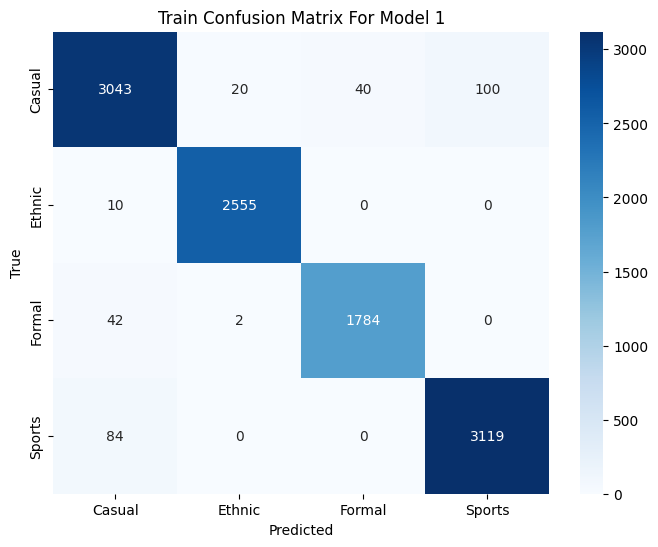

In [58]:
# printing confusion matrix
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_train, y_train_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Train Confusion Matrix For Model 1');

In [59]:
# STEP 1 — stack test embeddings
x_test_text_embeddings = np.stack(x_test['productEmbedding'].values)

# reshape to (batch, 1, 768)
x_test_text_embeddings = x_test_text_embeddings.reshape((-1, 1, 768))

# STEP 2 — images
x_test_image_data = np.stack(x_test['image_pixels'])

# STEP 3 — prediction
y_test_pred = model_1.predict({
    'text_input': x_test_text_embeddings,
    'image_input': x_test_image_data
})

# STEP 4 — accuracy
y_test_pred_classes = np.argmax(y_test_pred, axis=1)
print(f"Test accuracy: {accuracy_score(y_test, y_test_pred_classes)}")


85/85 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step
Test accuracy: 0.9155555555555556


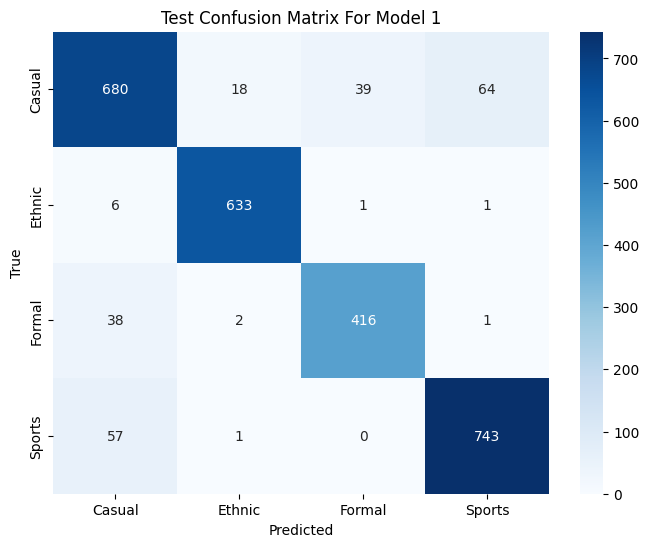

In [60]:
# printing confusion matrix for test
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test , y_test_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Test Confusion Matrix For Model 1');

In [61]:
# evaluating using f1 score on train and test
from sklearn.metrics import f1_score
m1_train = f1_score(y_train , y_train_pred_classes , average="weighted")
m1_test = f1_score(y_test , y_test_pred_classes , average="weighted")
print(f'train f1 score : {m1_train}')
print(f'test f1 score : {m1_test}')

train f1 score : 0.9723737368376199
test f1 score : 0.9151874030170409


### Second Model Evaluation ###

In [62]:
# testing model for underfitting
y_train_pred = model_2.predict([x_train_text_embeddings_2, x_train_image_data_2])
y_train_pred_classes = np.argmax(y_train_pred, axis=1)

# printing accuracy
from sklearn.metrics import accuracy_score
print(f'train accuracy : {accuracy_score(y_train , y_train_pred_classes)}')

338/338 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step
train accuracy : 0.946661727937772


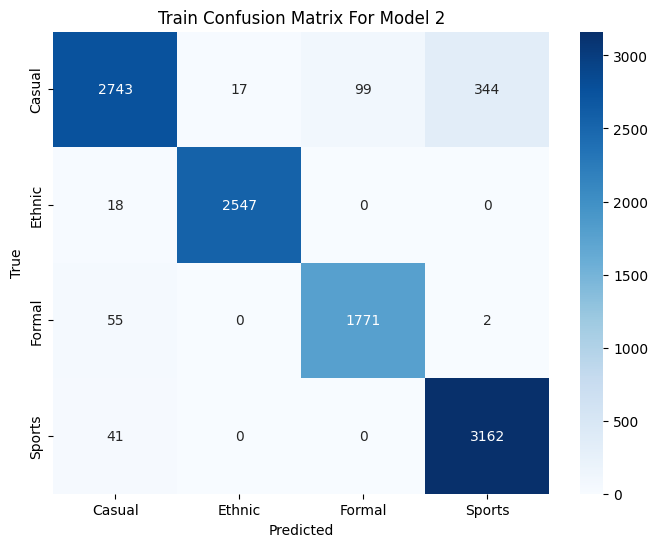

In [63]:
# printing confusion matrix
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_train, y_train_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Train Confusion Matrix For Model 2');

In [64]:
# STEP 1 — stack test embeddings (no reshape)
x_test_text_embeddings = np.stack(x_test['productEmbedding'].values)  # (test_size, 768)

# STEP 2 — images
x_test_image_data = np.stack(x_test['image_pixels'])                  # (test_size, 128,128,3)

# STEP 3 — prediction
y_test_pred = model_2.predict({
    'text_input': x_test_text_embeddings,
    'image_input': x_test_image_data
})

# STEP 4 — accuracy
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

print(f"Test accuracy: {accuracy_score(y_test, y_test_pred_classes)}")


85/85 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step
Test accuracy: 0.9237037037037037


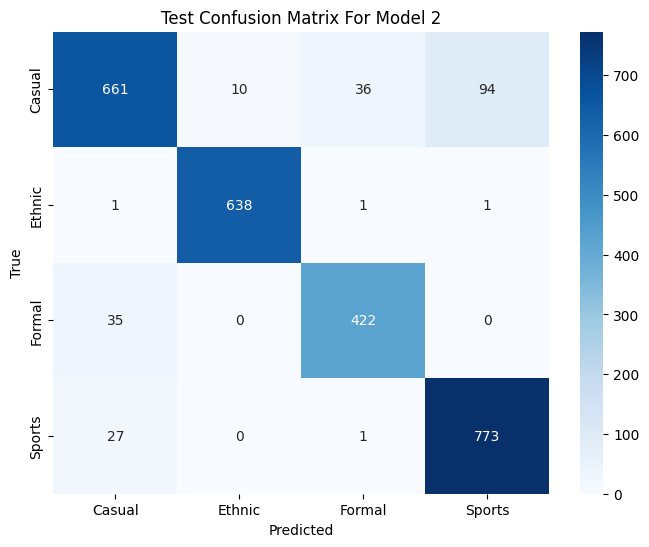

In [65]:
# printing confusion matrix for test
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test , y_test_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Test Confusion Matrix For Model 2');

In [66]:
# evaluating using f1 score on train and test
from sklearn.metrics import f1_score
m2_train = f1_score(y_train , y_train_pred_classes , average="weighted")
m2_test = f1_score(y_test , y_test_pred_classes , average="weighted")
print(f'train f1 score : {m2_train}')
print(f'test f1 score : {m2_test}')

train f1 score : 0.9460403877753989
test f1 score : 0.9227772723668604


## Comparing The Models ##

In [67]:
# evaluating using f1 score on train and test
from sklearn.metrics import f1_score
print(f'Model 1 train f1 score : {m1_train}')
print(f'Model 1 test f1 score : {m1_test}')
print("-"*50)
print(f'Model 2 train f1 score : {m2_train}')
print(f'Model 2 test f1 score : {m2_test}')

Model 1 train f1 score : 0.9723737368376199
Model 1 test f1 score : 0.9151874030170409
--------------------------------------------------
Model 2 train f1 score : 0.9460403877753989
Model 2 test f1 score : 0.9227772723668604


> model 2 is less overfitting than model 1

In [68]:
# saving model
model_2.save('model.h5')